In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler 



data = pd.read_csv("custom_sample_mass_radius_k2_15.csv", 
                   header=None, 
                   names=["Mass", "Radius","k2", "Type"], 
                   low_memory=False)

m_r_p = data.iloc[1:, :-1]
star_type = data.iloc[1:, -1]

scaler = StandardScaler()
m_r_p = scaler.fit_transform(m_r_p)


In [3]:
m_r_p

array([[-1.4156315 , -2.33093079,  2.59940551],
       [-1.20729717, -1.37995199,  2.13190621],
       [-0.99444971, -0.92233813,  1.83405853],
       ...,
       [-0.91889129, -0.13970939, -0.77389129],
       [-0.89711489, -0.33278443, -0.77584437],
       [-0.90507319, -0.44758659, -0.78768497]])

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(m_r_p, star_type, test_size=0.2, random_state=42)





In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Ensure labels are integers
star_type_int = star_type.astype(int)

# Define classifier
classifier = RandomForestClassifier(
    n_estimators=20,
    criterion="entropy",
    max_depth=3,
    max_features=1,
    random_state=0
)

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring dictionary with macro average for multiclass
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, average='macro'),
    "recall": make_scorer(recall_score, average='macro'),
    "f1": make_scorer(f1_score, average='macro')
}

# Run cross-validation
scores = cross_validate(classifier, m_r_p, star_type_int, cv=cv, scoring=scoring)

# Print mean ± std for each metric
print("Cross-validation results:")
for key in ["test_accuracy", "test_precision", "test_recall", "test_f1"]:
    mean = np.mean(scores[key])
    std = np.std(scores[key])
    print(f"{key}: {mean:.4f} ± {std:.4f}")


Cross-validation results:
test_accuracy: 0.9771 ± 0.0032
test_precision: 0.9775 ± 0.0033
test_recall: 0.9774 ± 0.0032
test_f1: 0.9771 ± 0.0032


accuracy score:99.39%


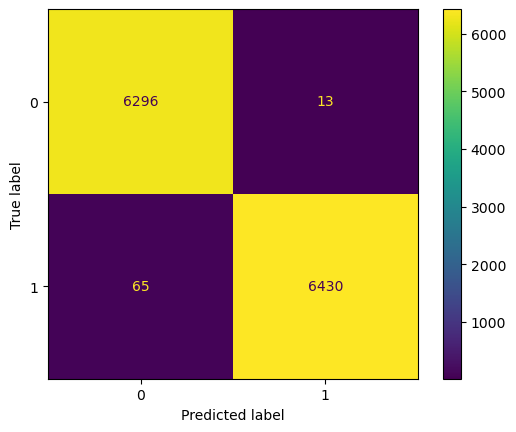

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot() 


print(f"accuracy score:{accuracy_score(y_test, y_pred) * 100:.2f}%")


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6309
           1       1.00      1.00      1.00      6495

    accuracy                           1.00     12804
   macro avg       1.00      1.00      1.00     12804
weighted avg       1.00      1.00      1.00     12804



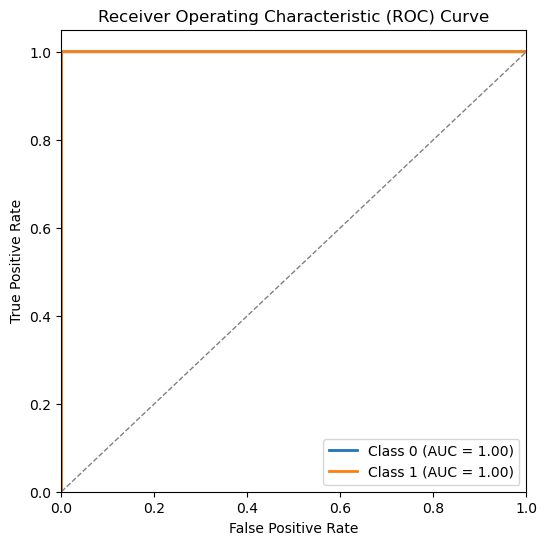

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt


# Train RandomForest model

# Predict probabilities for ROC curve
y_test_proba = classifier.predict_proba(X_test)
# Compute ROC curve and AUC score for each class
plt.figure(figsize=(6, 6))
for i, class_label in enumerate(classifier.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, i], pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=1) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()